In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [31]:
# converting gender column to numeric
# from sklearn.preprocessing import LabelEncoder
# label_encoder=LabelEncoder()
# dataset['Gender']=label_encoder.fit_transform(dataset['Gender'])
# dataset['Gender'].unique()

In [32]:
# to include gender
# X = dataset.iloc[:, [1, 3]].values
# y = dataset.iloc[:,4].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[67,  1],
       [13, 19]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.86


In [42]:
from sklearn.metrics import classification_report
print("classification_report:")
print( classification_report(y_pred, y_test))

classification_report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91        80
           1       0.59      0.95      0.73        20

    accuracy                           0.86       100
   macro avg       0.79      0.89      0.82       100
weighted avg       0.91      0.86      0.87       100



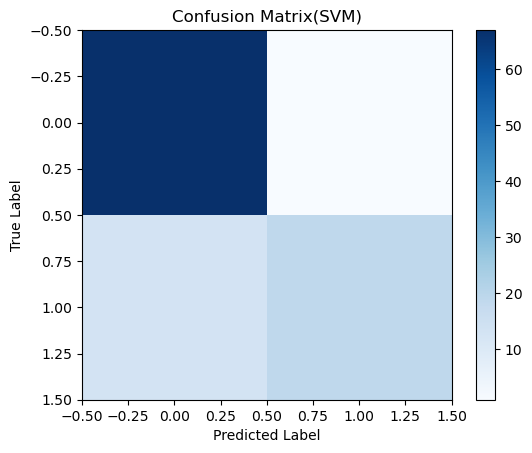

In [43]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix(SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()

# Show the plot
plt.show()

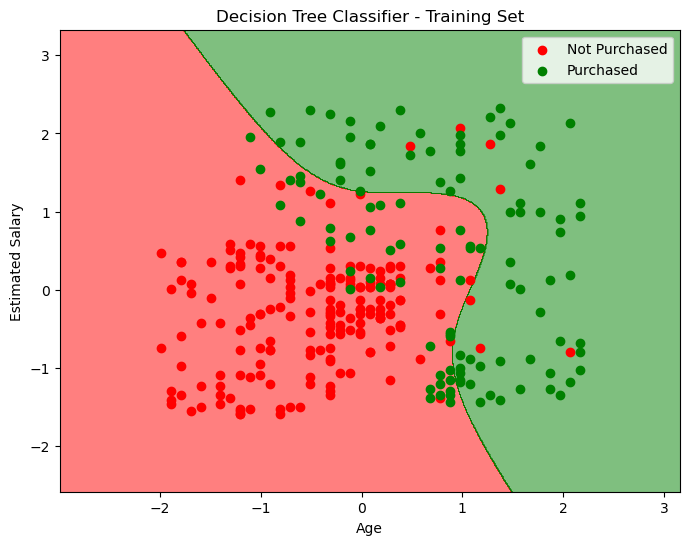

In [44]:
from matplotlib.colors import ListedColormap 
# Create a meshgrid to plot the decision boundary 
X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1,stop=X_train[:, 0].max() + 1, step=0.01), np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01)) 
# Use the classifier to predict the class labels for each point in the meshgrid 
Z = classifier.predict(np.array([X1.ravel(),X2.ravel()]).T)
Z = Z.reshape(X1.shape) 
# Create a color map for the plot 
cmap = ListedColormap(('red','green')) # Plot the training set data points 
plt.figure(figsize=(8, 6)) 
plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap) 
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],color='red', label='Not Purchased') 
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],color='green', label='Purchased') 
plt.title('Decision Tree Classifier - Training Set') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show() 

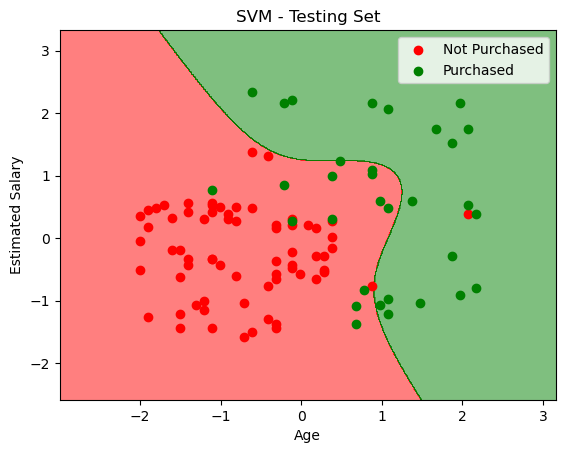

In [48]:
# Visualizing the Testing set results 
from matplotlib.colors import ListedColormap # Create a meshgrid of feature values 
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:,0].max() + 1, step = 0.01),np.arange(start = X_test[:, 1].min() - 1, stop =X_test[:, 1].max() + 1, step = 0.01)) 
# Use the trained classifier to make predictions on the meshgrid points 
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T) 
Z = Z.reshape(X1.shape) 
# Create a colormap for the two classes 
cmap = ListedColormap(('red','green')) 
# Plot the contour filled by the predictions 
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap) # Scatter plot the actual data points 
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color ='red', label = 'Not Purchased') 
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color = 'green',label = 'Purchased') 
# Add labels and legend 
plt.title('SVM - Testing Set') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
# Show the plot 
plt.show() 

# Decision Tree

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[62,  6],
       [ 4, 28]], dtype=int64)

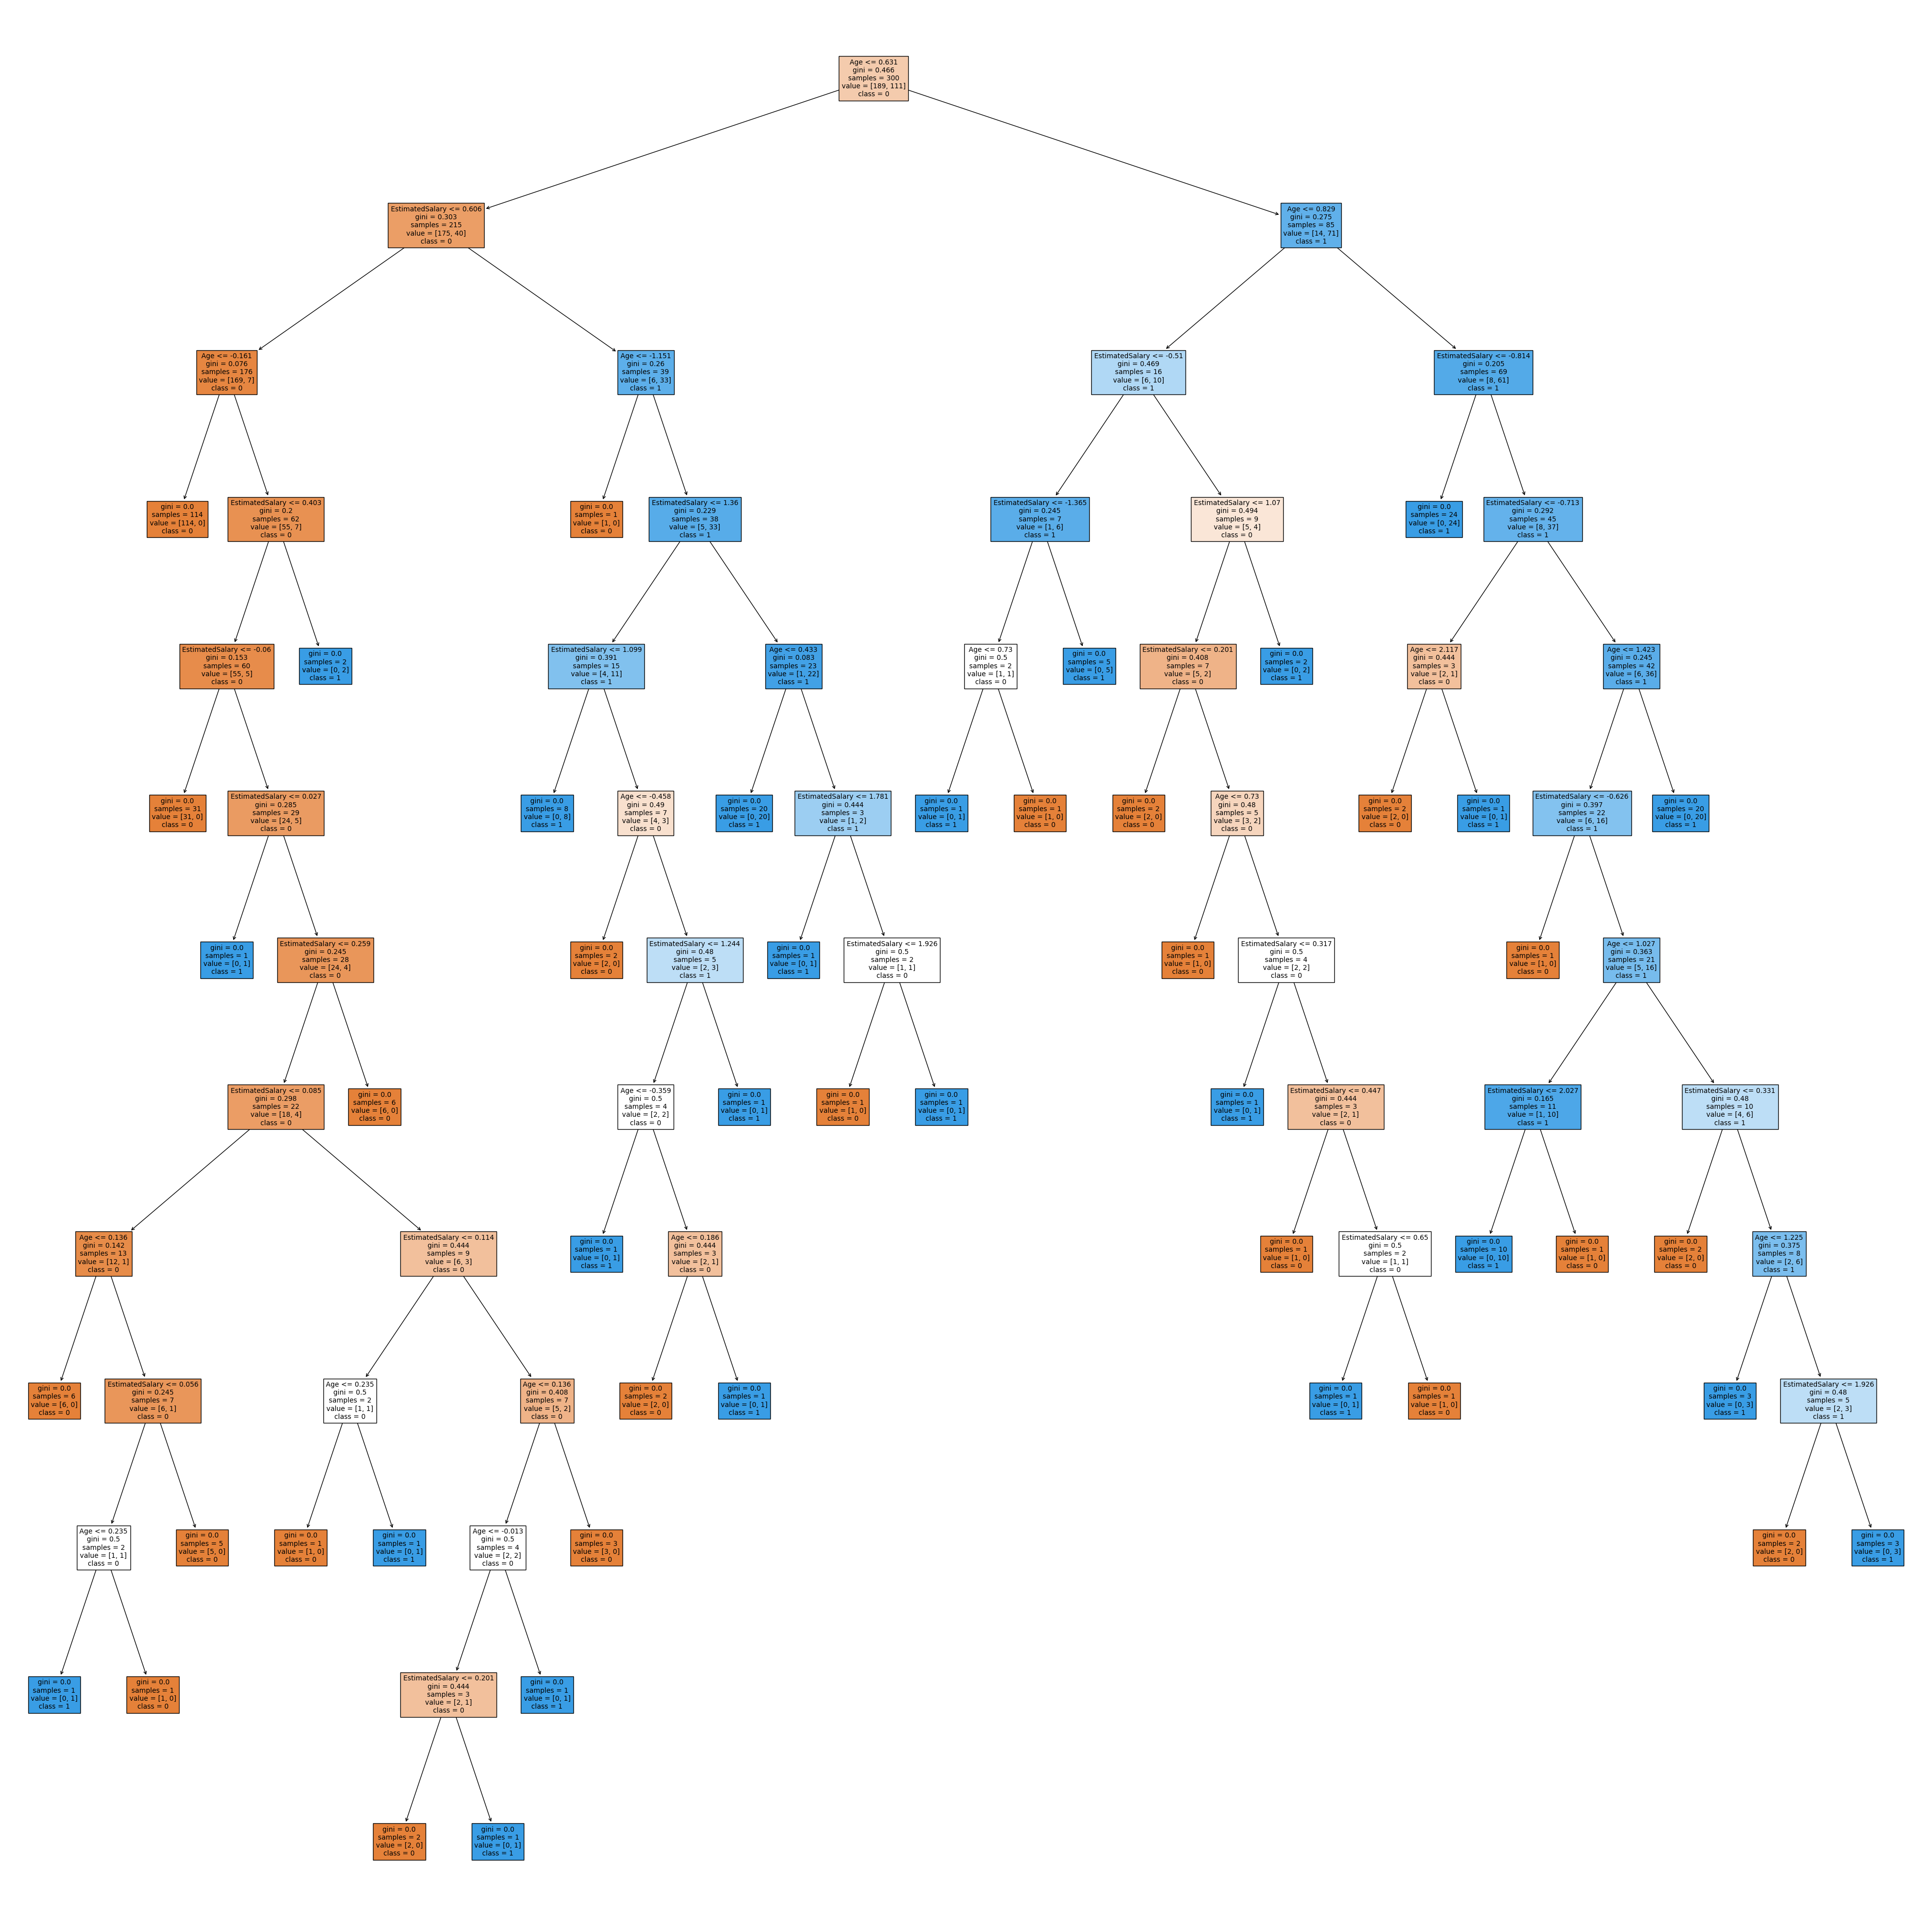

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(classifier, feature_names=['Age', 'EstimatedSalary'], class_names=['0', '1'], filled=True)
plt.show()

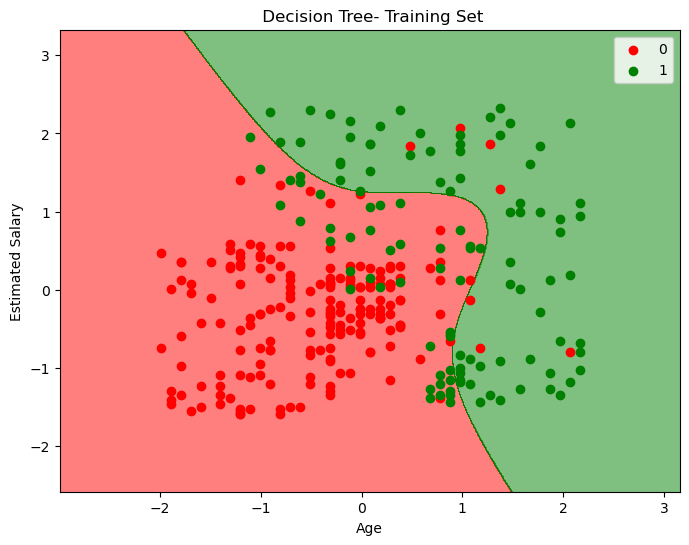

In [50]:
from matplotlib.colors import ListedColormap 
 
# Create a meshgrid to plot the decision boundary 
X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:,0].max() + 1, step=0.01),np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1,step=0.01)) 
 
# Use the classifier to predict the class labels for each point in the meshgrid Z = 
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T) 
Z = Z.reshape(X1.shape) 
 
# Create a color map for the plot 
cmap = ListedColormap(('red', 'green')) 
 
# Plot the training set data points 
plt.figure(figsize=(8, 6)) 
plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap) 
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='0') 
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='green', label='1') 
plt.title(' Decision Tree- Training Set') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show()

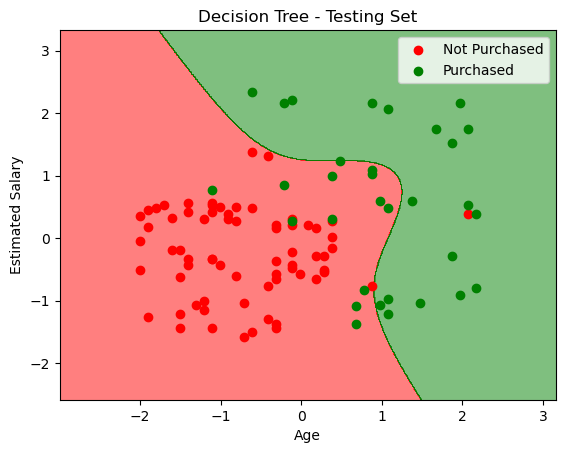

In [51]:
# Visualizing the Testing set results 
from matplotlib.colors import ListedColormap # Create a meshgrid of feature values 
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:,0].max() + 1, step = 0.01),np.arange(start = X_test[:, 1].min() - 1, stop =X_test[:, 1].max() + 1, step = 0.01)) 
# Use the trained classifier to make predictions on the meshgrid points 
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T) 
Z = Z.reshape(X1.shape) 
# Create a colormap for the two classes 
cmap = ListedColormap(('red','green')) 
# Plot the contour filled by the predictions 
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap) # Scatter plot the actual data points 
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color ='red', label = 'Not Purchased') 
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color = 'green',label = 'Purchased') 
# Add labels and legend 
plt.title('Decision Tree - Testing Set') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
# Show the plot 
plt.show() 